# Quantitative Portfolio Optimization and Risk Management System

## Business Problem: Portfolio Optimization and Risk Management

Investors and fund managers face the challenge of constructing portfolios that optimize returns while managing risk. The key objective is to maximize expected returns for a given level of risk or, conversely, minimize risk for a desired return level. Additionally, market participants need to allocate capital across various asset classes, such as equities, commodities, and cryptocurrencies, in a way that achieves diversification and reduces exposure to market volatility.

### The Business Problem:
- **Objective**: Construct an optimal investment portfolio that balances returns and risks.
- **Risk Management**: Identify the lowest-risk portfolio while maintaining acceptable returns.
- **Performance Maximization**: Maximize the Sharpe ratio, a measure of returns relative to risk.
- **Diversification**: Spread the investment across multiple asset classes to reduce risk while improving potential returns.

### Approach:
1. **Modern Portfolio Theory (MPT)**: This project uses MPT as the mathematical framework to construct an optimal portfolio. MPT suggests that investors can maximize returns for a given risk level by diversifying assets.
   - **Expected Return and Volatility**: Calculate the expected returns and volatilities of individual assets based on historical data.
   - **Covariance Matrix**: Compute the covariance between asset returns to capture correlations and overall portfolio risk.

2. **Monte Carlo Simulation**: Randomly generate thousands of portfolios with different asset weight combinations to explore the risk-return landscape and identify high-performing portfolios.
   - **Portfolio Returns and Volatility**: Calculate the expected portfolio returns, volatility, and Sharpe ratio for each simulated portfolio.
   - **Global Minimum Volatility (GMV) Portfolio**: Identify the portfolio with the lowest risk.
   - **Maximum Sharpe Ratio (MSR) Portfolio**: Find the portfolio that maximizes the risk-adjusted return (Sharpe ratio).

3. **Optimization Techniques**:
   - **Sharpe Ratio Maximization**: Use mathematical optimization to directly find the portfolio with the highest Sharpe ratio, adjusting asset weights accordingly.
   - **Minimizing Volatility**: Use optimization to find the portfolio with the lowest possible volatility while maintaining expected returns.

4. **Efficient Frontier**: Visualize the trade-off between risk and return by plotting the efficient frontier, representing the optimal portfolios that maximize returns for a given level of risk.

### Key Results:
- **Global Minimum Volatility (GMV) Portfolio**: Identifies the portfolio with the least risk, making it ideal for risk-averse investors.
- **Maximum Sharpe Ratio (MSR) Portfolio**: Shows the best risk-adjusted performance, offering higher returns for each unit of risk taken.
- **Comparison to Equal-Weighted Portfolio**: Demonstrates the superior performance of optimized portfolios compared to a naive strategy of equal weighting across all assets.

### Conclusion:
By applying Monte Carlo simulations and optimization techniques, we can construct portfolios that align with specific investment goals, whether they focus on minimizing risk or maximizing returns. These methodologies offer practical solutions for investors looking to achieve diversification, manage risk, and optimize the performance of their investments.


# MODERN PORTFOLIO THEORY (MPT)

The Modern portfolio theory (MPT) is a mathematical framework for assembling a portfolio of assets such that the expected return is maximized for a given level of volatility. It is a formalization of diversification in investing, i.e., the idea that owning different kinds of financial assets is less risky than owning one single asset.

The main assumptions of modern portfolio theory are:
 - Investors are rational and aim to maximize their returns, while avoiding risks
 - whenever possible.
 - Investors share the goal to maximize their expected returns.
 - All investors have the same level of information about potential investments.
 - Commissions, taxes, and transaction costs are not taken into account.
 - Investors can borrow and lend money (without limits) at a risk-free rate.



In [3]:
# Importing Library necessary for the project
import numpy as np
import pandas as pd
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['figure.figsize'] = [16, 10]

np.set_printoptions(precision=5, suppress=True,formatter={'float': lambda x: f'{x:6.3f}'})
import yfinance as yf
import scipy.optimize as sco

/var/folders/8j/w4cf450n1sscq6nksr6976b40000gn/T/ipykernel_3227/3675705626.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
#Creating a random portfolio of equities, crypto and commodities.
tickers = ['AAPL', 'MSFT','META', 'INTC','DIS', 'AMZN','KO','TSLA', 'BTC-USD' ,'GLD']
tickers.sort()
start = "2015-01-01"
end = "2022-07-08"

stocks = pd.DataFrame()
for stock_name in tickers:
    # daily data
    stocks[stock_name] = yf.download(stock_name,start,end)['Adj Close']  
    
stocks = round(stocks,2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
stocks

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
Date,,,,,,,,,,
2015-01-02,24.37,15.43,315.03,86.69,114.08,27.90,30.89,78.21,40.23,14.62
2015-01-05,23.69,15.11,274.47,85.43,115.80,27.58,30.89,76.96,39.86,14.01
2015-01-06,23.69,14.76,286.19,84.97,117.12,27.07,31.13,75.92,39.28,14.09
2015-01-07,24.02,14.92,294.34,85.84,116.43,27.64,31.52,75.92,39.78,14.06
2015-01-08,24.94,15.02,283.35,86.73,115.94,28.15,31.90,77.95,40.95,14.04
...,...,...,...,...,...,...,...,...,...,...
2022-06-30,135.03,106.21,19784.73,93.66,168.46,35.24,58.78,160.77,251.94,224.47
2022-07-01,137.22,109.56,19269.37,95.39,168.32,34.23,60.15,159.55,254.64,227.26
2022-07-05,139.81,113.50,20190.12,96.42,164.75,34.56,59.12,167.69,257.85,233.07


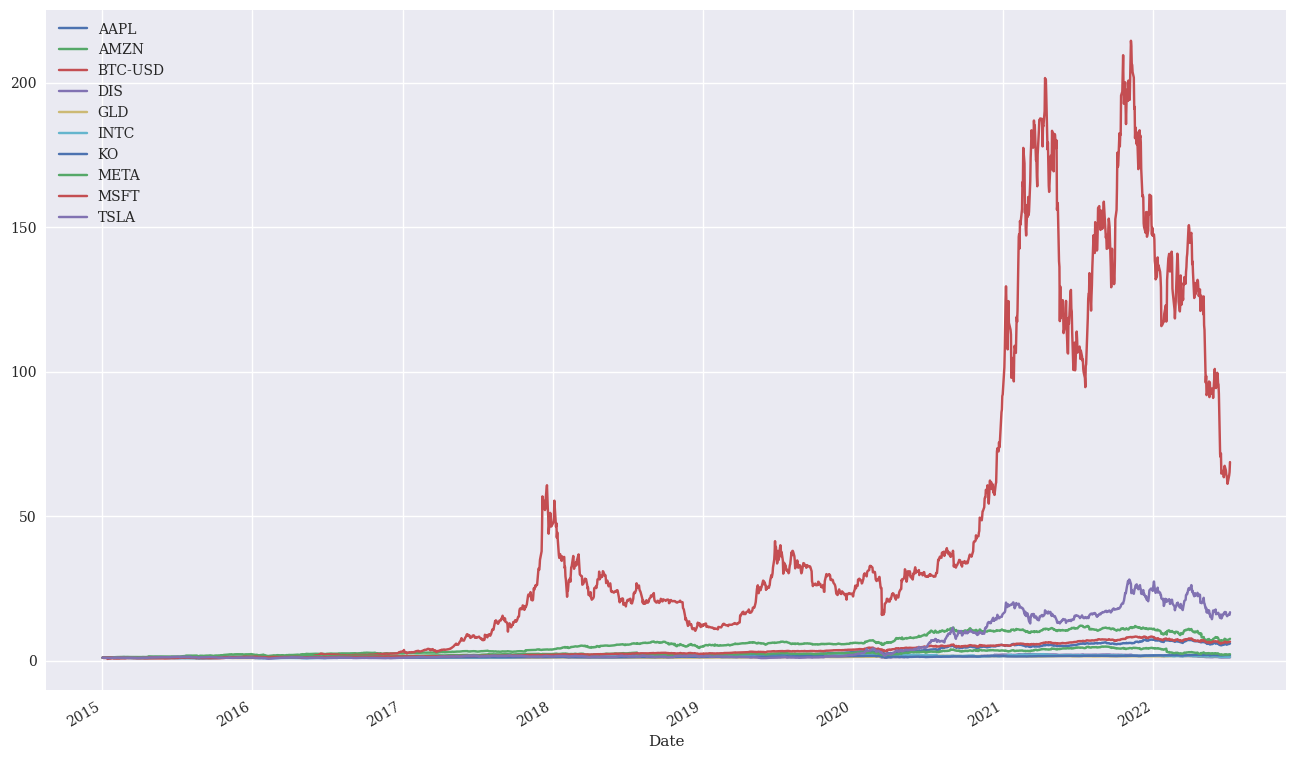

In [7]:
#Lets Visualize the behaviour of each stock's price normalized 
(stocks[tickers] / stocks[tickers].iloc[0]).plot(figsize=(16, 10));

## Return of a portfolio

The total return of the porfolio is going to be a simple weigthed average of the (total) returns of single assets, i.e.:
        ${R_p} =\sum \limits _{i=1} ^{N}  {w_i}  {R_i} = {w^T}  R $
where ${R_i},{R_p}$ are return of stock i and return of portfolio. ${R} := ({R_1},..........,{R_N})^T$ Note that if we have a dataset of past returns, the total return  ${R_p}$ is computed as above using the returns of the past data. On the other hand, if we are going to invest now, we do not have a series of true (past) return, but we instead would have expected returns. Hence, in this case we would have the maean value $\mathbb{E}$ in the formula above.


In [9]:
#Computing log daily returns of each stock
daily_ret = np.log(stocks / stocks.shift(1)).dropna()
daily_ret

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
Date,,,,,,,,,,
2015-01-05,-0.028300,-0.020957,-0.137826,-0.014641,0.014965,-0.011536,0.000000,-0.016112,-0.009240,-0.042619
2015-01-06,0.000000,-0.023436,0.041814,-0.005399,0.011334,-0.018665,0.007739,-0.013606,-0.014658,0.005694
2015-01-07,0.013834,0.010782,0.028080,0.010187,-0.005909,0.020838,0.012450,0.000000,0.012649,-0.002131
2015-01-08,0.037586,0.006680,-0.038053,0.010315,-0.004217,0.018283,0.011984,0.026387,0.028988,-0.001423
2015-01-09,0.001202,-0.011383,0.024611,0.004831,0.011321,0.001775,-0.011032,-0.005661,-0.008584,-0.018692
...,...,...,...,...,...,...,...,...,...,...
2022-06-30,-0.018200,-0.025195,-0.016009,-0.013153,-0.006096,0.003411,0.002896,-0.016532,-0.013288,-0.017750
2022-07-01,0.016089,0.031054,-0.026394,0.018303,-0.000831,-0.029079,0.023040,-0.007617,0.010660,0.012353
2022-07-05,0.018699,0.035330,0.046677,0.010740,-0.021438,0.009594,-0.017272,0.049760,0.012527,0.025244


In [10]:
#Compting Annualized Returns
N_DAYS = 252     # number of trading dates in a years
annual_ret = daily_ret.mean() * N_DAYS
annual_ret

AAPL       0.237370
AMZN       0.269349
BTC-USD    0.563936
DIS        0.014529
GLD        0.046949
INTC       0.033689
KO         0.085783
META       0.104824
MSFT       0.250486
TSLA       0.375598
dtype: float64

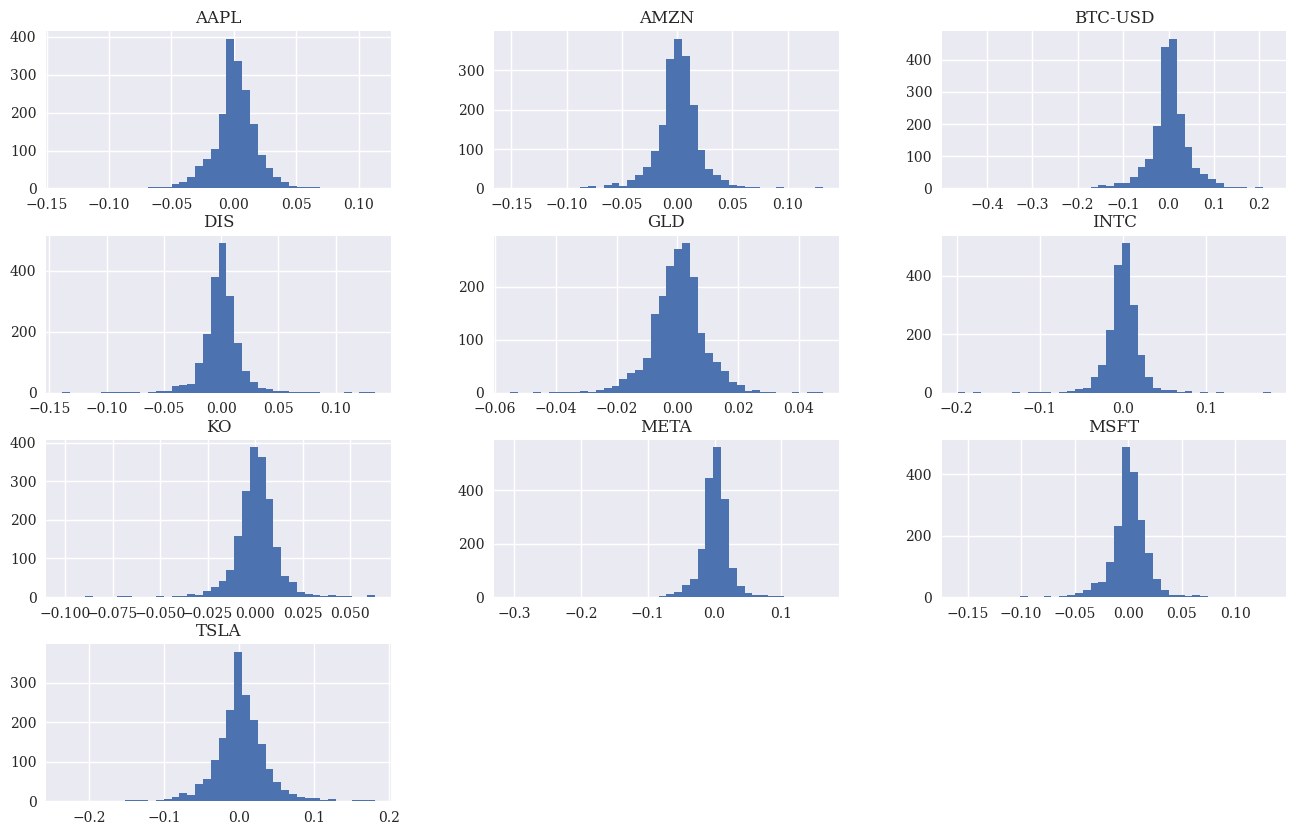

In [11]:
# Lets visualize the distribution of returns for each stock in our portfolio
daily_ret.hist(bins=40, figsize=(16, 10));

## Volatility of a portfolio

The volatility of the porfolio is computed as the (square root of the) variance of the weigthed sum of the returns of single assets. Formal representation is as follows: 
${\sigma ^2 }_p = \mathbb{E}({r_i} - \mu_i) ({r_j} - \mu_j)$
            ${=} {\sum_i} {\sum_j} {w_i} {w_j}$
            ${=} {w^T} {\sum} {w} $
where ${\sigma ^2}_p$ is portfolio variance and T attribute or transpose() method gives the transpose of a vector or matrix.


In [12]:
#Create a annualized covariance matrix of the portfolio
cov_mat = daily_ret.cov() * N_DAYS
cov_mat

,AAPL,AMZN,BTC-USD,DIS,GLD,INTC,KO,META,MSFT,TSLA
AAPL,0.087371,0.054702,0.033942,0.035174,-0.000228,0.052014,0.021441,0.058901,0.057240,0.071129
AMZN,0.054702,0.102952,0.033104,0.031497,-0.000432,0.044572,0.014576,0.068469,0.058127,0.071124
BTC-USD,0.033942,0.033104,0.548690,0.033175,0.008415,0.036479,0.009528,0.034270,0.034874,0.058384
DIS,0.035174,0.031497,0.033175,0.073704,-0.001773,0.037125,0.023442,0.037154,0.035405,0.044351
GLD,-0.000228,-0.000432,0.008415,-0.001773,0.019678,0.000470,0.001203,-0.000009,-0.000925,0.002379
INTC,0.052014,0.044572,0.036479,0.037125,0.000470,0.105168,0.023318,0.050225,0.054393,0.064149
KO,0.021441,0.014576,0.009528,0.023442,0.001203,0.023318,0.035897,0.017731,0.022870,0.020532
META,0.058901,0.068469,0.034270,0.037154,-0.000009,0.050225,0.017731,0.126543,0.058261,0.070534
MSFT,0.057240,0.058127,0.034874,0.035405,-0.000925,0.054393,0.022870,0.058261,0.076077,0.066909
TSLA,0.071129,0.071124,0.058384,0.044351,0.002379,0.064149,0.020532,0.070534,0.066909,0.317207


## Efficient Frontiers

In the MPT, the efficient frontier is a curve denoting the efficient part of the volatility-return plane. Formally, it is the set of portfolios that can be constructed with the given input assets that have the maximum expected returns for a fixed level of volatility and, in turn, the lowest volatilities for a fixed level of expected return. The efficient frontier was first formulated by Harry Markowitz (1952).

We have to construct a portfolio of several assets and we want to find the optimal percentages of investment to be allocated in these assets so that, for example, the total (expected) return of such a portfolio is maximixed for a given level of volatility.

Suppose we have $ {N > 1} $ stocks and we decide to invest our capital in them. Let ${w} := ({w_1},..........,{w_N})^T$ , with $ {w_i} \epsilon (0,1) $  for all ${i} = 1,2,.......,{N}$ , where each ${w_i}$ represents the proportion of the investiment (a percentage of the capital invested) in asset . These quantities are the weights.

Since we invest all of our capital, there holds $ \sum {w_i} = 1$  (this is a long-only strategy).

In [13]:
# Create effecient frontier using monte carlo simulation
N_PORTFOLIOS = 10 ** 5
n_assets = len(tickers)


In [14]:
#Simulate random portfolio weights:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /=  np.sum(weights, axis=1)[:, np.newaxis]

In [15]:
#Calculate the portfolio metrics:
portf_rtns = np.dot(weights, annual_ret)

portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)  
portf_sharpe_ratio = portf_rtns / portf_vol

In [16]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol,'sharpe_ratio': portf_sharpe_ratio})
portf_results_df

,returns,volatility,sharpe_ratio
0,0.248272,0.257697,0.963425
1,0.266164,0.261502,1.017829
2,0.159250,0.208345,0.764357
3,0.134754,0.188425,0.715160
4,0.127805,0.209518,0.609997
...,...,...,...
99995,0.214615,0.224664,0.955269
99996,0.254691,0.265332,0.959897
99997,0.176037,0.214476,0.820779
99998,0.263952,0.276691,0.953959


Now we create a scatter plot coloured by sharpe ratios of the portfolios generated above 

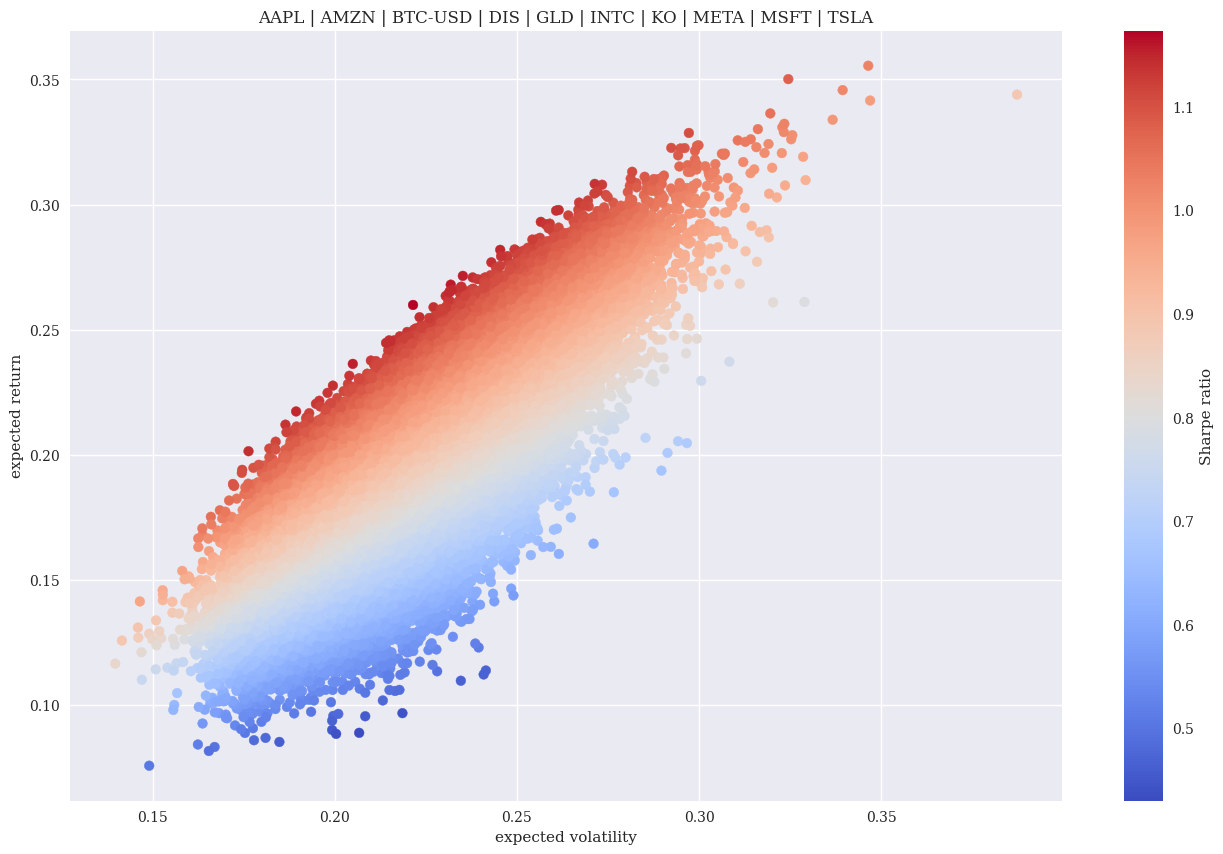

In [17]:
#Plotting the results of monte carlo simulation
plt.figure(figsize=(16, 10))
fig = plt.scatter(portf_results_df['volatility'], portf_results_df['returns'],
c=portf_results_df['sharpe_ratio'], cmap='coolwarm')
cb = plt.colorbar(fig)
cb.set_label('Sharpe ratio')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.title(' | '.join(tickers));

We can see that if the investor is targeting a return of 20%  he could simply hold a portfolio with volatility of  about 18% , although there are many other portfolios that can guarantee the same return but with much higher volatilities. It is clear that one should carefully choose the weights of the portfolio.

We can see, in particular, that there are two important portfolios:

- the portfolio with the Global Minimum Volatility (GMV), i.e., the global minimum variance portfolio
- the portfolio with the Maximum Sharpe Ratio (MSR).

From the code above we can easily locate these two portfolios in our dataframe by looking at the lowest volatility and highest sharpe ratio and and recover the corresponding weights that have been stored.

In [18]:
# find the portfolio with lowest volatility 
low_vol_portfolio = portf_results_df.iloc[ portf_results_df['volatility'].idxmin() ]
print("Global Minimum Volatility portfolio:")
print("- return      : {:.2f}%".format(low_vol_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(low_vol_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(low_vol_portfolio[2]) )

# find the portfolio with highest sharpe ratio
high_sharpe_portfolio = portf_results_df.iloc[ portf_results_df['sharpe_ratio'].idxmax() ]
print("Maximum Sharpe Ratio portfolio:")
print("- return      : {:.2f}%".format(high_sharpe_portfolio[0]*100) )
print("- volatility  : {:.2f}%".format(high_sharpe_portfolio[1]*100) )
print("- sharpe ratio: {:.2f}".format(high_sharpe_portfolio[2]) )

Global Minimum Volatility portfolio:
- return      : 11.65%
- volatility  : 13.97%
- sharpe ratio: 0.83
Maximum Sharpe Ratio portfolio:
- return      : 25.99%
- volatility  : 22.14%
- sharpe ratio: 1.17


In [19]:
#Lets plot an efficient frontier too for that lets figure out data points on efficient frontier
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)


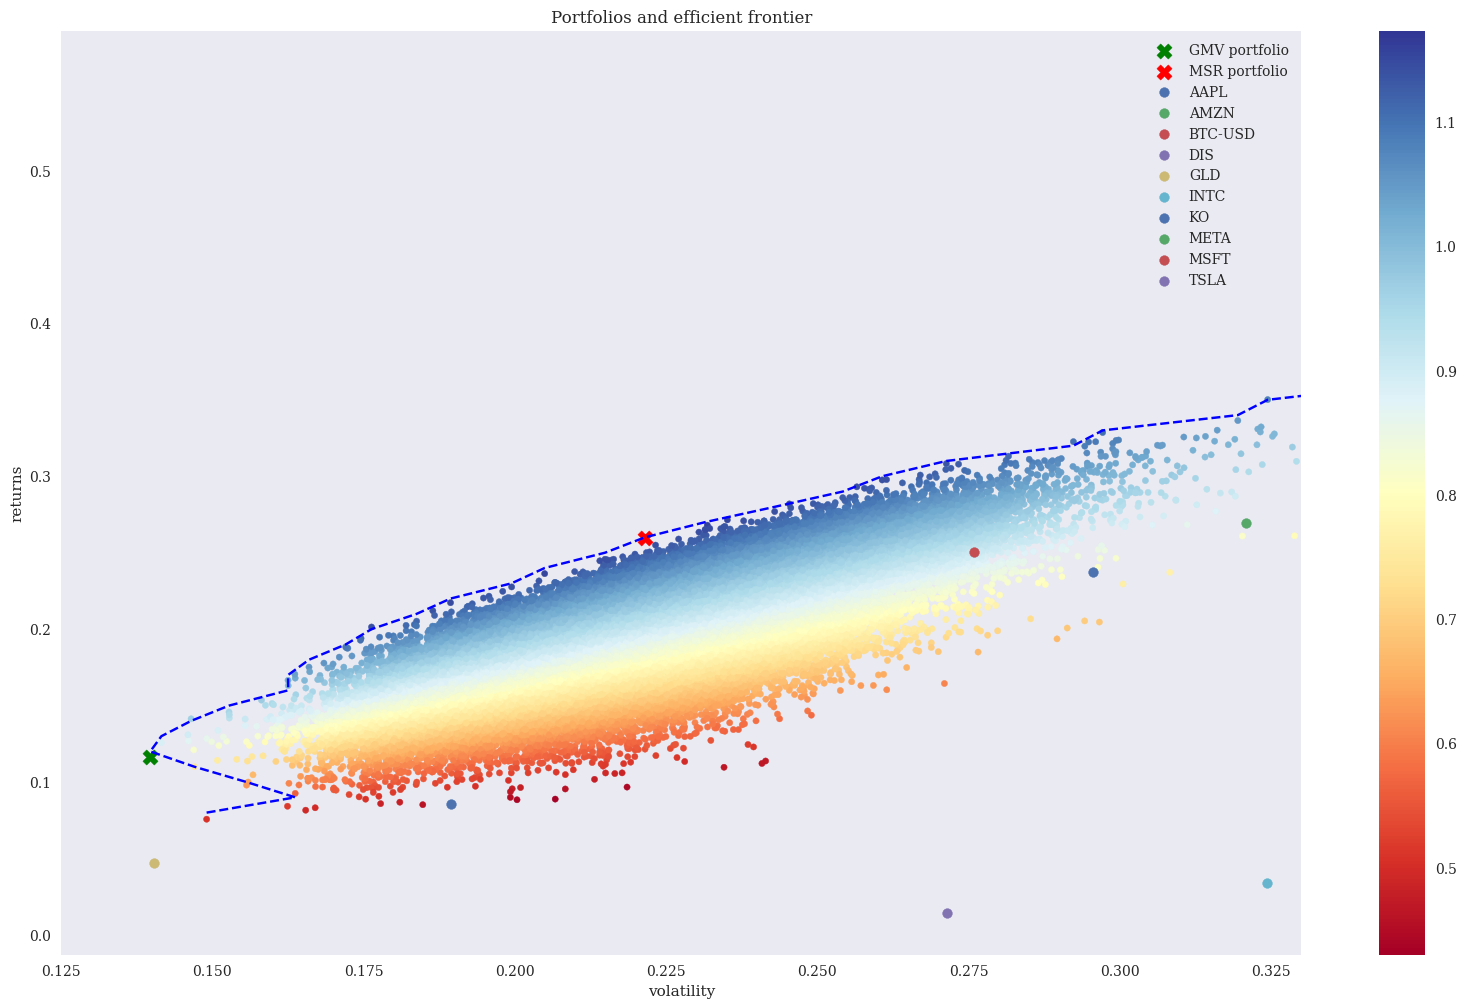

In [20]:
#Plotting EF, GMV, MSR and individual stocks returns vs volitility

fig, ax = plt.subplots(1,1, figsize=(20,12)) 

im = ax.scatter(portf_results_df["volatility"], portf_results_df["returns"], c=portf_results_df["sharpe_ratio"], s=20, edgecolor=None, label=None, cmap='RdYlBu')
ax.set_title("Portfolios and efficient frontier")
ax.set_xlabel("volatility")
ax.set_ylabel("returns")
ax.grid()

ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
ax.scatter(low_vol_portfolio[1],     low_vol_portfolio[0],     marker="X", color='g', s=120, label="GMV portfolio")
ax.scatter(high_sharpe_portfolio[1], high_sharpe_portfolio[0], marker="X", color='r', s=120, label="MSR portfolio")
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=annual_ret[asset_index], 
                #marker=MARKS[asset_index], 
                #s=150, 
                #color='black',
                label=tickers[asset_index])

ax.set_xlim([0.125,0.33])
ax.legend()

fig.colorbar(im, ax=ax)
plt.show()

## Finding the optimal portfolios: maximizing the sharpe ratio
Now, consider the case of finding the portfolio (on the efficient frontier) with the highest sharpe ratio. Note that scipy offers a minimize method, but no a maximize a method, and we may then conclude that we are not able to find such a portfolio by solving an optimization problem. However, the maximization of the sharpe ratio is nothing but the minimization of the negative sharpe ratio. That is, we have:
${minimize} - ({R_p}-{r_f})/{\sigma_p} =:Sharpe Ratio $

subject to:

$\left\{
    \begin{array}{ll}
        {w^T}1 \mbox  = 1 \\
        {0 } \leq w \geq 1
    \end{array}
\right.$
 


In [21]:
#Define functions calculating portfolio returns and volatility:
def neg_sharpe_ratio(w, avg_rtns, cov_mat, rf_rate):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    portf_sharpe_ratio = (portf_returns - rf_rate) / portf_volatility
    return -portf_sharpe_ratio

def port_vol(w, avg_rtns, cov_mat):
    portf_returns = np.sum(avg_rtns * w)
    portf_volatility = np.sqrt(np.dot(w.T, np.dot(cov_mat, w)))
    return portf_volatility 

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

In [22]:
RF_RATE = 0

args = (annual_ret, cov_mat, RF_RATE)
constraints = ({'type': 'eq', 
                'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(n_assets))
initial_guess = n_assets * [1. / n_assets]

max_sharpe_portf_opt = sco.minimize(neg_sharpe_ratio, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)

In [23]:
max_sharpe_portf_w = max_sharpe_portf_opt['x']
print("Global Maximum Sharpe Ratio portfolio:")
max_sharpe_portf = {'Return': get_portf_rtn(max_sharpe_portf_w, 
                                            annual_ret),
                    'Volatility': port_vol(max_sharpe_portf_w, 
                                                annual_ret, 
                                                cov_mat),
                    'Sharpe Ratio': -max_sharpe_portf_opt['fun']}
max_sharpe_portf

Global Maximum Sharpe Ratio portfolio:


{'Return': 0.2233958050445341,
 'Volatility': 0.1861356047253639,
 'Sharpe Ratio': 1.2001777165316987}

## Finding the optimal portfolios: minimizing the volatility

In the experiments above, we found the optimal portfolios, i.e., the ones on the efficient frontier, by simulating a high number of portfolios and then plotting them. From the plot we could see what the efficient frontier looked like. However, we can find an optimal portfolio on the efficient frontier by solving a minimization problem, for example, by applying the scipy optimize method.

For example, suppose we want to find the portfolio (on the efficient frontier) which has the minimum volatility. Then the minimization problem is:

${minimize} : {1/2} {w^T} \sum{w} , $

such that:

$\left\{
    \begin{array}{ll}
        {w^T}1 \mbox  = 1 \\
        {0 } \leq w \geq 1
    \end{array}
\right.$


In [24]:
args = (annual_ret, cov_mat)
min_potf_vol_opt = sco.minimize(port_vol, 
                                x0=initial_guess, 
                                args=args,
                                method='SLSQP', 
                                bounds=bounds, 
                                constraints=constraints)


In [25]:
#Optimal Weight for Maximum Sharpe Ratio Portfolio
opt_min_vol_w = min_potf_vol_opt['x']
opt_min_vol_w

array([ 0.014,  0.050,  0.000,  0.071,  0.614,  0.000,  0.235,  0.003,
        0.013,  0.000])

In [26]:
print("Global Minimum Volitility portfolio:")
min_potf_vol = {'Return': get_portf_rtn(opt_min_vol_w, 
                                            annual_ret),
                    'Volatility': port_vol(opt_min_vol_w, 
                                                annual_ret, 
                                                cov_mat),
                    'Sharpe Ratio': -neg_sharpe_ratio(opt_min_vol_w, 
                                                annual_ret, 
                                                cov_mat,0)}
min_potf_vol

Global Minimum Volitility portfolio:


{'Return': 0.07029665507349052,
 'Volatility': 0.1105285035044144,
 'Sharpe Ratio': 0.6360047665956405}

We can now expand on this code to increase our universe of stocks and use optimazation techniques to allocate optimal portfolio weights based on requirements. We also notice that monte carlo method yields better results as the returns are higher for maximum sharpe ratio whereas for GMV portfolio optimization outperforms the simulation.   

## Lets Visualize the returns of our optimized portfolio against the benchmark of equally weighted porttfolio. 

In [27]:
ret_msr = (daily_ret*max_sharpe_portf_w).sum(axis='columns')
total_ret_msr = (ret_msr+1).cumprod()
ret_gmv = (daily_ret*opt_min_vol_w).sum(axis='columns')
total_ret_gmv = (ret_gmv+1).cumprod()

In [28]:
eweights = np.array(n_assets * [1. / n_assets,])
ret_ewp = (daily_ret*eweights).sum(axis='columns')
total_ret_ewp = (ret_ewp+1).cumprod()

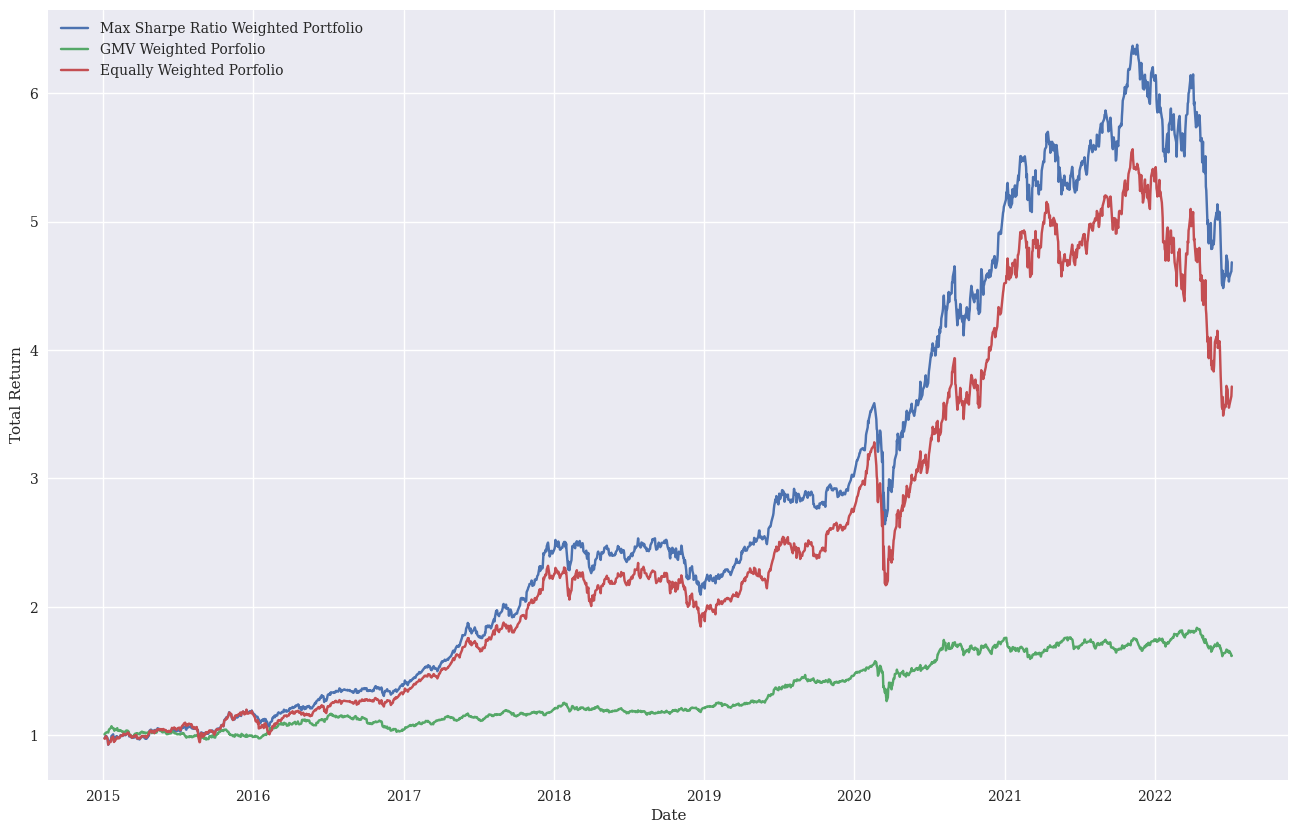

In [29]:
plt.plot(total_ret_msr, label='Max Sharpe Ratio Weighted Portfolio')
plt.plot(total_ret_gmv, label='GMV Weighted Porfolio')
plt.plot(total_ret_ewp, label='Equally Weighted Porfolio')
plt.xlabel('Date')
plt.ylabel('Total Return')
plt.legend(loc="upper left")

Optimized Sharpe ratio weighted portfolio outperforms the benchmark whereas the minimum volitility porfolio also does its job as we can see less volitilty in our returns for that series.